<a href="https://colab.research.google.com/github/Raoina/Spectra-2-Image/blob/main/notebooks/Models/PLS_with_Moisture_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
from scipy.signal import savgol_filter
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Si-Ware/DL_FreshCS_train_Multiple_Refs.csv')
display(df)

,Scanner ID,Sample ID,Moi,3921.568654,3935.185205,3948.801765,3962.418316,3976.034876,3989.651427,4003.267987,...,7284.857826,7298.474386,7312.090937,7325.707497,7339.324048,7352.940608,7366.557159,7380.173719,7393.790269,7407.406829
0,21060017,Fermented_#_501860,41.00052,18.418626,18.203804,18.029354,17.886841,17.781741,17.733732,17.771375,...,56.518470,57.020849,57.437340,57.788849,58.102487,58.409435,58.729662,59.071404,59.433733,59.812683
1,21060017,Fermented_#_501860,41.00052,17.248456,17.035236,16.867362,16.732971,16.633673,16.585954,16.616447,...,55.072503,55.613406,56.065989,56.449153,56.788504,57.117224,57.460443,57.833951,58.243754,58.688512
2,21060017,Fermented_#_501860,41.00052,18.027023,17.797180,17.610394,17.455654,17.338883,17.282314,17.317228,...,59.389437,59.977661,60.453837,60.840246,61.171445,61.494558,61.846557,62.248987,62.705286,63.204264
3,21060017,Fermented_#_501860,41.00052,18.416102,18.214302,18.051670,17.909884,17.794767,17.734292,17.767441,...,55.554990,56.083525,56.529748,56.898149,57.196891,57.453303,57.700326,57.971976,58.294010,58.677149
4,21060017,Fermented_#_501860,41.00052,17.835506,17.629661,17.468430,17.329677,17.215373,17.150954,17.174831,...,57.914093,58.409864,58.836813,59.218349,59.567331,59.894564,60.209043,60.523319,60.854571,61.222055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8158,22030100,Fresh_#_729664,75.11131,3.883258,3.873837,3.868519,3.864503,3.865311,3.879779,3.911481,...,24.856843,25.386553,25.779215,26.064303,26.296468,26.542786,26.859771,27.276689,27.783551,28.336967
8159,22030100,Fresh_#_729664,75.11131,4.091054,4.075642,4.075985,4.086805,4.106418,4.137689,4.177941,...,26.207255,26.959162,27.608505,28.143509,28.553183,28.842454,29.044148,29.226150,29.472004,29.854060
8160,22030100,Fresh_#_729664,75.11131,4.210691,4.200616,4.194826,4.191789,4.198309,4.226164,4.275738,...,26.405400,27.037143,27.526619,27.896413,28.187530,28.450873,28.732940,29.070450,29.479781,29.956319
8161,22030100,Fresh_#_729664,75.11131,4.023484,4.029191,4.046982,4.062500,4.073295,4.090207,4.120147,...,24.307705,24.670533,24.898373,25.085587,25.306047,25.594131,25.946527,26.348452,26.791019,27.279671


In [ ]:
df = df.groupby('Sample ID').mean()
display(df.head())

,Scanner ID,Moi,3921.568654,3935.185205,3948.801765,3962.418316,3976.034876,3989.651427,4003.267987,4016.884537,...,7284.857826,7298.474386,7312.090937,7325.707497,7339.324048,7352.940608,7366.557159,7380.173719,7393.790269,7407.406829
Sample ID,,,,,,,,,,,,,,,,,,,,,
Fermented_#_480926,21060017.0,60.823286,7.729080,7.622415,7.546208,7.481664,7.423155,7.377601,7.358989,7.381517,...,34.616084,35.288379,35.845357,36.327769,36.777222,37.228529,37.695179,38.173677,38.652607,39.125314
Fermented_#_480927,21060017.0,50.485837,9.720940,9.584006,9.485654,9.401768,9.326291,9.270802,9.256881,9.306069,...,42.449703,43.100897,43.648566,44.136925,44.609373,45.097435,45.608556,46.131176,46.646221,47.142563
Fermented_#_480929,21060017.0,63.115711,7.551404,7.444440,7.367629,7.300275,7.237015,7.186719,7.165871,7.190576,...,34.907780,35.560699,36.103651,36.578961,37.026430,37.475247,37.932452,38.389652,38.834516,39.264430
Fermented_#_480932,21060017.0,65.419594,6.526686,6.434280,6.366056,6.301643,6.235700,6.175937,6.136361,6.129914,...,27.640183,28.252847,28.764077,29.212927,29.634762,30.056096,30.485576,30.919745,31.351121,31.777759
Fermented_#_480933,21060017.0,62.917114,6.840954,6.757292,6.697071,6.637614,6.573048,6.512227,6.471038,6.464014,...,28.069196,28.715024,29.254844,29.724470,30.160514,30.594707,31.040131,31.494608,31.948344,32.395361


In [ ]:
spc_cols = [col for col in df.columns if col[0].isdigit()]
X_df = df[spc_cols]

y_df = df[['Moi']]

X_df.to_csv('spc_df.csv', index=False)
y_df.to_csv('moi_df.csv', index=False)
print(X_df.shape)
print(y_df.shape)
print("X_df and moi_df created and saved as y_df.csv and moi_df.csv")

(784, 257)
(784, 1)
X_df and moi_df created and saved as y_df.csv and moi_df.csv


In [ ]:
display(X_df.head())

,3921.568654,3935.185205,3948.801765,3962.418316,3976.034876,3989.651427,4003.267987,4016.884537,4030.501097,4044.117648,...,7284.857826,7298.474386,7312.090937,7325.707497,7339.324048,7352.940608,7366.557159,7380.173719,7393.790269,7407.406829
Sample ID,,,,,,,,,,,,,,,,,,,,,
Fermented_#_480926,7.729080,7.622415,7.546208,7.481664,7.423155,7.377601,7.358989,7.381517,7.454154,7.577913,...,34.616084,35.288379,35.845357,36.327769,36.777222,37.228529,37.695179,38.173677,38.652607,39.125314
Fermented_#_480927,9.720940,9.584006,9.485654,9.401768,9.326291,9.270802,9.256881,9.306069,9.431605,9.634163,...,42.449703,43.100897,43.648566,44.136925,44.609373,45.097435,45.608556,46.131176,46.646221,47.142563
Fermented_#_480929,7.551404,7.444440,7.367629,7.300275,7.237015,7.186719,7.165871,7.190576,7.270485,7.406037,...,34.907780,35.560699,36.103651,36.578961,37.026430,37.475247,37.932452,38.389652,38.834516,39.264430
Fermented_#_480932,6.526686,6.434280,6.366056,6.301643,6.235700,6.175937,6.136361,6.129914,6.163474,6.236180,...,27.640183,28.252847,28.764077,29.212927,29.634762,30.056096,30.485576,30.919745,31.351121,31.777759
Fermented_#_480933,6.840954,6.757292,6.697071,6.637614,6.573048,6.512227,6.471038,6.464014,6.498781,6.574416,...,28.069196,28.715024,29.254844,29.724470,30.160514,30.594707,31.040131,31.494608,31.948344,32.395361


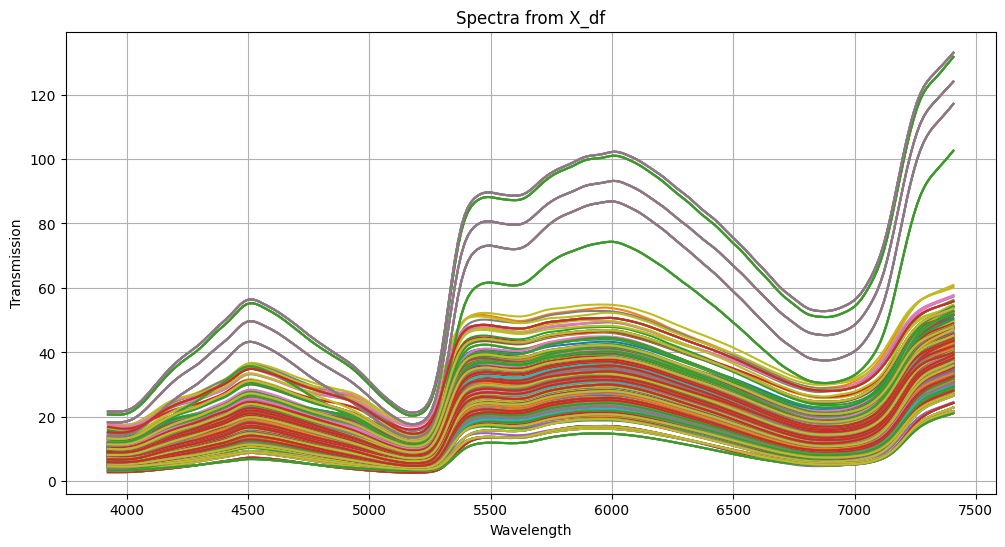

In [ ]:
plt.figure(figsize=(12, 6))
for index, row in X_df.iterrows():
    plt.plot(X_df.columns, row)

plt.title('Spectra from X_df')
plt.xlabel('Wavelength')
plt.ylabel('Transmission')
plt.grid(True)
plt.show()

In [ ]:
# Preprocessing (T2A => Savitzky–Golay => SNV => mean)

from scipy.signal import savgol_filter
import numpy as np
import pandas as pd # Import pandas

def savitzky_golay(spectra_df, window_length, polyorder):
    #Apply Savitzky-Golay filter to the spectra.
    # Ensure window_length is odd and greater than polyorder
    if window_length % 2 == 0:
        window_length += 1
    if window_length <= polyorder:
        window_length = polyorder + 2
    # Apply filter row-wise and collect results
    filtered_data = spectra_df.apply(lambda x: savgol_filter(x, window_length, polyorder), axis=1)
    # Ensure the result is a DataFrame
    if isinstance(filtered_data, pd.Series):
        filtered_values = np.apply_along_axis(lambda row: savgol_filter(row, window_length, polyorder), axis=1, arr=spectra_df.values)
        return pd.DataFrame(filtered_values, index=spectra_df.index, columns=spectra_df.columns)
    else:
        return filtered_data # Should already be a DataFrame

def normalize_spectra(spectra_df):
    #Normalize each spectrum in the DataFrame by its L2 norm.
    return spectra_df.apply(lambda x: x / np.linalg.norm(x), axis=1)

def transmission_to_absorbance(spectra_df):
    # Add a small epsilon to avoid log10(0)
    epsilon = 1e-10
    return -np.log10(spectra_df + epsilon)

def snv(df, eps=1e-12):
    # ensure numeric (non-numeric -> NaN, which SNV will preserve)
    df = df.apply(pd.to_numeric, errors='coerce')

    row_mean = df.mean(axis=1)                  # Series indexed by rows
    row_std  = df.std(axis=1, ddof=0)           # population std; avoids NaN with 1 sample
    row_std  = row_std.mask(row_std < eps, 1.0) # avoid divide-by-zero

    # Row-wise center and scale (note axis=0!)
    return df.sub(row_mean, axis=0).div(row_std, axis=0)


def mean_center(spectra_df):
    #Perform mean centering on the spectral data.
    return spectra_df - spectra_df.mean(axis=0)

In [ ]:
# Apply preprocessing steps in the specified order
X_preprocessed = transmission_to_absorbance(X_df)
X_preprocessed = savitzky_golay(X_preprocessed, window_length=11, polyorder=2) # Example parameters
X_preprocessed = snv(X_preprocessed)
X_preprocessed = mean_center(X_preprocessed)

print("Preprocessing applied successfully.")
display(X_preprocessed.head())

Preprocessing applied successfully.


,3921.568654,3935.185205,3948.801765,3962.418316,3976.034876,3989.651427,4003.267987,4016.884537,4030.501097,4044.117648,...,7284.857826,7298.474386,7312.090937,7325.707497,7339.324048,7352.940608,7366.557159,7380.173719,7393.790269,7407.406829
Sample ID,,,,,,,,,,,,,,,,,,,,,
Fermented_#_480926,-0.115557,-0.108332,-0.101090,-0.093831,-0.086555,-0.079262,-0.071231,-0.063137,-0.055965,-0.050327,...,-0.097146,-0.093684,-0.090694,-0.088366,-0.086934,-0.086190,-0.086181,-0.086906,-0.088367,-0.090563
Fermented_#_480927,0.097385,0.111757,0.123907,0.133834,0.141539,0.147021,0.152219,0.154392,0.152274,0.145475,...,-0.081890,-0.072916,-0.065943,-0.060950,-0.057883,-0.055358,-0.054240,-0.054528,-0.056223,-0.059325
Fermented_#_480929,-0.098122,-0.089083,-0.080477,-0.072304,-0.064564,-0.057257,-0.049068,-0.041613,-0.036040,-0.032914,...,-0.049802,-0.043932,-0.039028,-0.035202,-0.032497,-0.029991,-0.028214,-0.027166,-0.026848,-0.027259
Fermented_#_480932,-0.359644,-0.352048,-0.343123,-0.332868,-0.321283,-0.308369,-0.293148,-0.276562,-0.259741,-0.243338,...,-0.144054,-0.145237,-0.145983,-0.146897,-0.148447,-0.150681,-0.153334,-0.156406,-0.159896,-0.163806
Fermented_#_480933,-0.384668,-0.379514,-0.372661,-0.364110,-0.353859,-0.341910,-0.326848,-0.310192,-0.293299,-0.276960,...,-0.172006,-0.175434,-0.178237,-0.180921,-0.183962,-0.187708,-0.191719,-0.195994,-0.200533,-0.205337


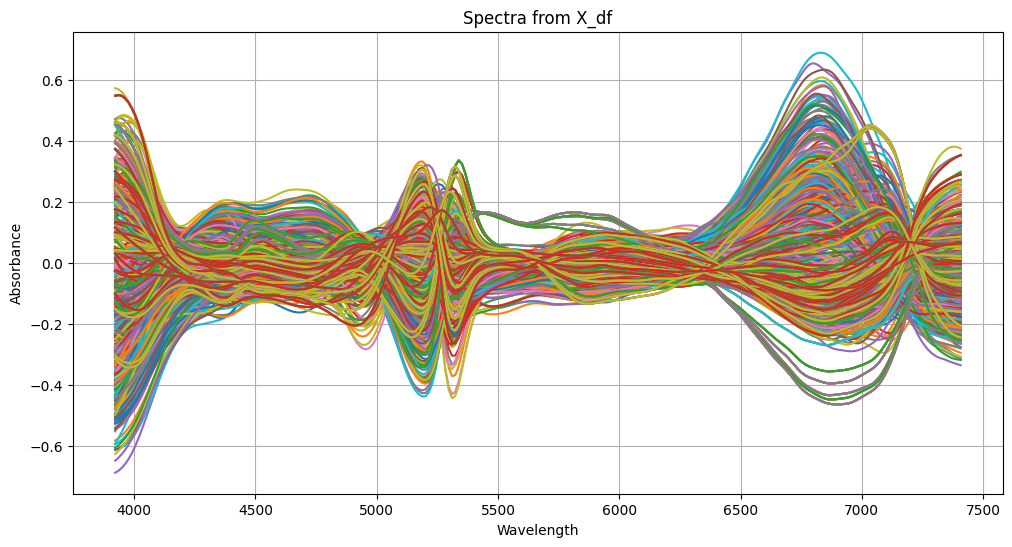

In [ ]:
plt.figure(figsize=(12, 6))
for index, row in X_preprocessed.iterrows():
    plt.plot(X_preprocessed.columns, row)

plt.title('Spectra from X_df')
plt.xlabel('Wavelength')
plt.ylabel('Absorbance')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_df, test_size=0.3, random_state=42)

print("Data split into training and testing sets:")
print(f"Spectroscopic data (training): {X_train.shape}")
print(f"Spectroscopic data (testing): {X_test.shape}")
print(f"Moisture data (training): {y_train.shape}")
print(f"Moisture data (testing): {y_test.shape}")

Data split into training and testing sets:
Spectroscopic data (training): (548, 257)
Spectroscopic data (testing): (236, 257)
Moisture data (training): (548, 1)
Moisture data (testing): (236, 1)


# Task
Apply cross-validation with 5 folds to choose the number of Latent Variables (LVs) for a PLS model, testing from 1 to 20 LVs. Calculate and display the R2 score for each number of LVs and plot an elbow curve showing the R2 score for each LV.

Number of LVs: 1, Mean R2 Score: 0.1861
Number of LVs: 2, Mean R2 Score: 0.3941
Number of LVs: 3, Mean R2 Score: 0.5516
Number of LVs: 4, Mean R2 Score: 0.6349
Number of LVs: 5, Mean R2 Score: 0.7061
Number of LVs: 6, Mean R2 Score: 0.7541
Number of LVs: 7, Mean R2 Score: 0.7782
Number of LVs: 8, Mean R2 Score: 0.7913
Number of LVs: 9, Mean R2 Score: 0.8087
Number of LVs: 10, Mean R2 Score: 0.8114


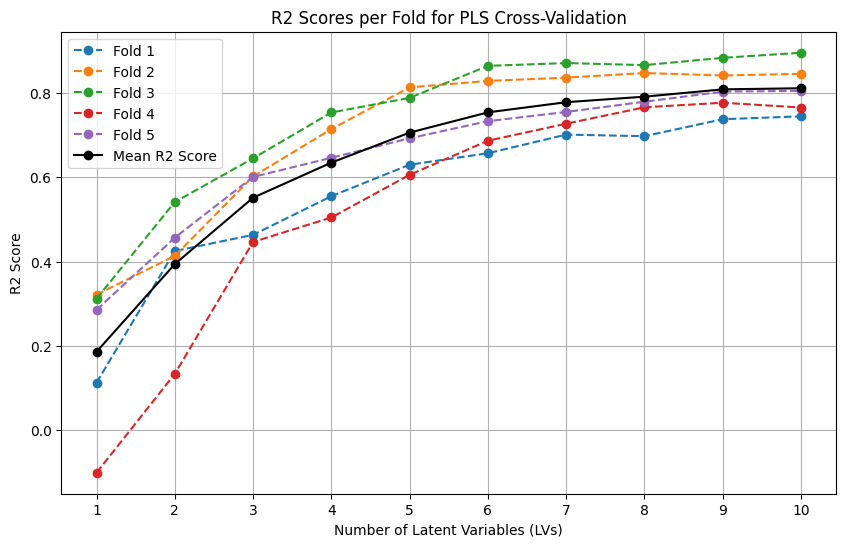


Optimal number of Latent Variables (based on highest Mean R2 score): 5


In [ ]:
# Before preprocessing
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Define the range of latent variables to test
n_components = np.arange(1, 11) # Testing from 1 to 20 LVs

r2_scores_all = [] # To store all R2 scores

# Perform cross-validation for each number of latent variables
for n in n_components:
    pls = PLSRegression(n_components=n)
    # Use cross_val_score with R2 as the scoring metric
    scores = cross_val_score(pls, X_train, y_train, cv=5, scoring='r2')
    r2_scores_all.append(scores) # Append the list of scores for each LV

# Display the R2 scores for each number of LVs
for n, scores in zip(n_components, r2_scores_all):
    #print(f"Number of LVs: {n}, R2 Scores (per fold): {scores}")
    print(f"Number of LVs: {n}, Mean R2 Score: {scores.mean():.4f}")


# Plot the individual R2 scores for each fold
plt.figure(figsize=(10, 6))
for i in range(5): # Assuming 5 folds
    plt.plot(n_components, [scores[i] for scores in r2_scores_all], marker='o', linestyle='--', label=f'Fold {i+1}')

# Plot the mean R2 scores
plt.plot(n_components, [scores.mean() for scores in r2_scores_all], marker='o', linestyle='-', color='black', label='Mean R2 Score')


plt.title('R2 Scores per Fold for PLS Cross-Validation')
plt.xlabel('Number of Latent Variables (LVs)')
plt.ylabel('R2 Score')
plt.xticks(n_components)
plt.legend()
plt.grid(True)
plt.show()

# Identify the optimal number of latent variables based on mean R2 score
mean_r2_scores = [scores.mean() for scores in r2_scores_all]
optimal_lv_index = np.argmax(mean_r2_scores)
optimal_lv = n_components[optimal_lv_index]
print(f"\nOptimal number of Latent Variables (based on highest Mean R2 score): 5")

Number of LVs: 1, Mean R2 Score: 0.5307
Number of LVs: 2, Mean R2 Score: 0.7361
Number of LVs: 3, Mean R2 Score: 0.7571
Number of LVs: 4, Mean R2 Score: 0.7843
Number of LVs: 5, Mean R2 Score: 0.8391
Number of LVs: 6, Mean R2 Score: 0.8450
Number of LVs: 7, Mean R2 Score: 0.8507
Number of LVs: 8, Mean R2 Score: 0.8538
Number of LVs: 9, Mean R2 Score: 0.8546
Number of LVs: 10, Mean R2 Score: 0.8559


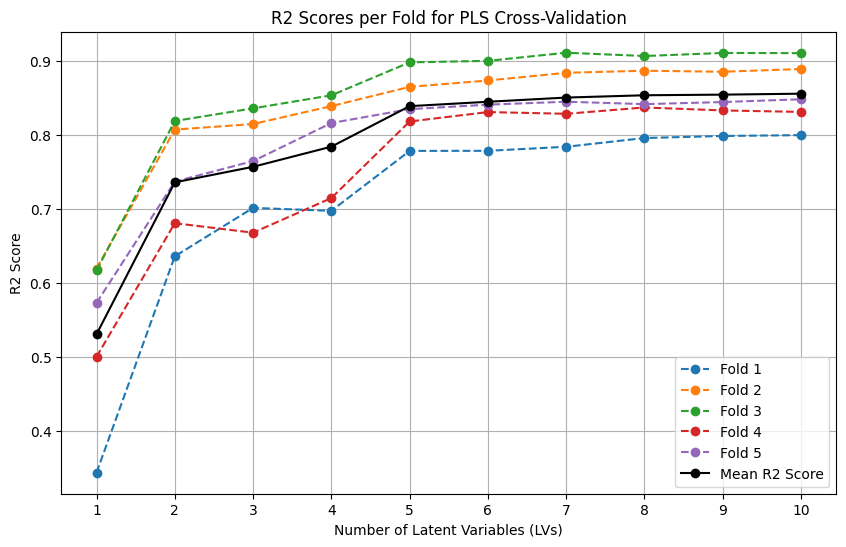


Optimal number of Latent Variables (based on highest Mean R2 score): 5


In [ ]:
# after preprocessing
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Define the range of latent variables to test
n_components = np.arange(1, 11) # Testing from 1 to 20 LVs

r2_scores_all = [] # To store all R2 scores

# Perform cross-validation for each number of latent variables
for n in n_components:
    pls = PLSRegression(n_components=n)
    # Use cross_val_score with R2 as the scoring metric
    scores = cross_val_score(pls, X_train, y_train, cv=5, scoring='r2')
    r2_scores_all.append(scores) # Append the list of scores for each LV

# Display the R2 scores for each number of LVs
for n, scores in zip(n_components, r2_scores_all):
    #print(f"Number of LVs: {n}, R2 Scores (per fold): {scores}")
    print(f"Number of LVs: {n}, Mean R2 Score: {scores.mean():.4f}")


# Plot the individual R2 scores for each fold
plt.figure(figsize=(10, 6))
for i in range(5): # Assuming 5 folds
    plt.plot(n_components, [scores[i] for scores in r2_scores_all], marker='o', linestyle='--', label=f'Fold {i+1}')

# Plot the mean R2 scores
plt.plot(n_components, [scores.mean() for scores in r2_scores_all], marker='o', linestyle='-', color='black', label='Mean R2 Score')


plt.title('R2 Scores per Fold for PLS Cross-Validation')
plt.xlabel('Number of Latent Variables (LVs)')
plt.ylabel('R2 Score')
plt.xticks(n_components)
plt.legend()
plt.grid(True)
plt.show()

# Identify the optimal number of latent variables based on mean R2 score
mean_r2_scores = [scores.mean() for scores in r2_scores_all]
optimal_lv_index = np.argmax(mean_r2_scores)
optimal_lv = n_components[optimal_lv_index]
print(f"\nOptimal number of Latent Variables (based on highest Mean R2 score): 5")

# R2 Score in CV with 5 Latent Variables:
## **0.8391**

In [ ]:
# Calculate RMSE for 5 LVs during cross-validation
pls_5_lv = PLSRegression(n_components=5)
rmse_scores = np.sqrt(-cross_val_score(pls_5_lv, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))

# Calculate the mean RMSE
mean_rmse_lv5 = np.mean(rmse_scores)

# Print the mean RMSE
print(f"\nMean RMSE in CV with 5 Latent Variables: {mean_rmse_lv5:.4f}")


Mean RMSE in CV with 5 Latent Variables: 2.4552


In [ ]:
# Instantiate a PLSRegression object with n_components=5
pls_model = PLSRegression(n_components=5)

# Fit the PLS model to the training data
pls_model.fit(X_train, y_train)

print("PLS model with 5 LVs trained successfully on the training data.")

PLS model with 5 LVs trained successfully on the training data.


In [ ]:
y_pred = pls_model.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
# Calculate R2 score on the test set
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the calculated metrics
print(f"R2 Score on the test set: {r2:.4f}")
print(f"RMSE on the test set: {rmse:.4f}")

R2 Score on the test set: 0.8466
RMSE on the test set: 2.7401


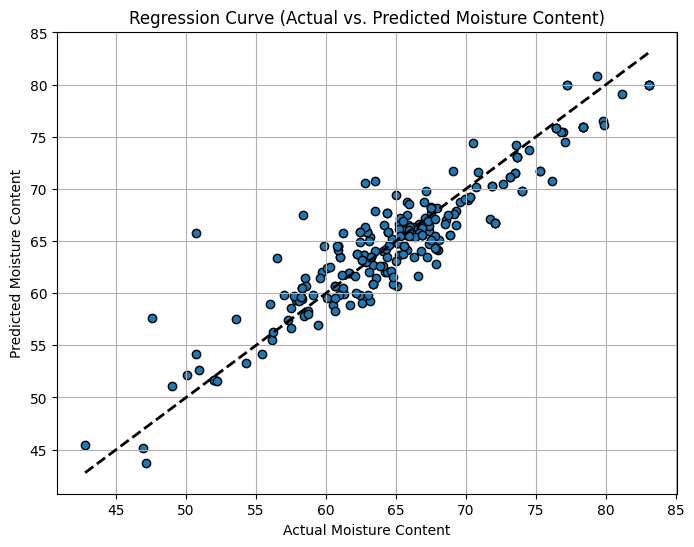

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Moisture Content')
plt.ylabel('Predicted Moisture Content')
plt.title('Regression Curve (Actual vs. Predicted Moisture Content)')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression

# Instantiate PLS model with the optimal number of components (let's use 5 as you've focused on it)
# You can change n_components if you want to check CV for a different number of LVs
pls = PLSRegression(n_components=5)

# Perform 5-fold cross-validation and get R2 scores for each fold
r2_scores_folds = cross_val_score(pls, X_train, y_train, cv=5, scoring='r2')

# Print R2 score for each fold
print("R2 Scores for each fold in 5-fold cross-validation:")
for i, score in enumerate(r2_scores_folds):
    print(f"Fold {i+1}: {score:.4f}")

# Calculate and print the mean R2 score across folds
mean_r2_cv = r2_scores_folds.mean()
print(f"\nMean R2 Score across all folds: {mean_r2_cv:.4f}")

R2 Scores for each fold in 5-fold cross-validation:
Fold 1: 0.7786
Fold 2: 0.8651
Fold 3: 0.8983
Fold 4: 0.8184
Fold 5: 0.8351

Mean R2 Score across all folds: 0.8391


---
---
---
 - # **Now working with all predictors**
---
---
---

In [38]:
test_df = pd.read_csv('/content/drive/MyDrive/Si-Ware/moisture Si-Ware dataset/All predictors/DL_FreshCS_test_Multiple_Refs.csv')
display(test_df)
train_df = pd.read_csv('/content/drive/MyDrive/Si-Ware/moisture Si-Ware dataset/All predictors/DL_FreshCS_train_Multiple_Refs.csv')
display(train_df)

,Scanner,Sample,Moi,NDF,Starch,3921.568654,3935.18188,3948.795106,3962.408332,3976.021558,...,7284.03545,7297.648676,7311.261902,7324.875128,7338.488353,7352.101579,7365.714805,7379.328031,7392.941257,7406.554483
0,22030077,1,57.02,37.67,37.84,7.209724,7.202985,7.208119,7.222696,7.258278,...,38.932550,39.595226,40.219869,40.823632,41.396258,41.917661,42.375544,42.786740,43.177964,43.578847
1,22030077,1,57.02,37.67,37.84,6.802202,6.786788,6.780681,6.782455,6.805124,...,37.986222,38.679829,39.260441,39.754916,40.186044,40.582608,40.971723,41.394751,41.882680,42.451031
2,22030077,1,57.02,37.67,37.84,7.890556,7.886369,7.891463,7.899888,7.926916,...,40.293261,40.944037,41.545459,42.118273,42.643149,43.082208,43.410055,43.651383,43.865255,44.137235
3,22030077,1,57.02,37.67,37.84,7.741266,7.740978,7.762811,7.796629,7.849472,...,39.061605,39.623743,40.143299,40.666132,41.198445,41.715807,42.192246,42.641311,43.095348,43.595889
4,22030077,1,57.02,37.67,37.84,6.642168,6.647871,6.665882,6.686998,6.720952,...,37.307641,38.113560,38.788978,39.330331,39.747478,40.085455,40.398576,40.749179,41.170187,41.662778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,22030179,6,66.09,39.93,31.72,4.625264,4.590987,4.559324,4.538609,4.547827,...,30.146761,30.695254,31.218930,31.735490,32.235239,32.703073,33.132870,33.536604,33.946312,34.395520
428,22030179,6,66.09,39.93,31.72,4.697036,4.698089,4.681587,4.649535,4.628445,...,29.809300,30.504197,31.140799,31.725688,32.247351,32.694071,33.064726,33.377436,33.674737,34.008411
429,22030179,6,66.09,39.93,31.72,5.045485,5.036507,5.037608,5.043338,5.069877,...,31.416181,32.004128,32.502634,32.968987,33.436174,33.911647,34.378054,34.807339,35.182201,35.520784
430,22030179,6,66.09,39.93,31.72,4.726907,4.714416,4.715961,4.721099,4.738957,...,30.732153,31.369639,31.948807,32.515030,33.077851,33.622038,34.120100,34.551440,34.920691,35.266418


,Scanner ID,Sample ID,Moi,NDF,Starch,3921.568654,3935.185205,3948.801765,3962.418316,3976.034876,...,7284.857826,7298.474386,7312.090937,7325.707497,7339.324048,7352.940608,7366.557159,7380.173719,7393.790269,7407.406829
0,0,Fermented_#_519374,65.916589,34.34,37.86,7.942349,7.879306,7.818098,7.758485,7.708171,...,28.317286,28.983611,29.563827,30.078988,30.546206,30.978860,31.386878,31.777386,32.156782,32.532960
1,0,Fermented_#_519374,65.916589,34.34,37.86,7.419641,7.349567,7.286254,7.220075,7.152485,...,30.350159,31.063256,31.657065,32.168421,32.636662,33.087229,33.531162,33.970926,34.407003,34.843520
2,0,Fermented_#_519374,65.916589,34.34,37.86,7.505473,7.453863,7.412702,7.378596,7.353883,...,27.907187,28.491096,29.009951,29.480590,29.909929,30.302208,30.666498,31.019581,31.383385,31.778342
3,0,Fermented_#_519374,65.916589,34.34,37.86,7.501803,7.404250,7.300882,7.197936,7.111502,...,29.322861,29.997931,30.556176,31.034004,31.470861,31.893944,32.316505,32.741858,33.169309,33.600686
4,0,Fermented_#_519374,65.916589,34.34,37.86,7.249132,7.194527,7.142602,7.090535,7.044868,...,27.426496,28.029293,28.492752,28.871351,29.224750,29.601149,30.024162,30.489263,30.971840,31.443427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8158,22030101,Fresh_#_734007_5,61.020607,44.51,18.93,21.072748,21.082432,21.085079,21.039924,21.073130,...,126.318138,128.343010,130.100436,131.705051,133.224590,134.704392,136.130287,137.479463,138.765888,140.046953
8159,22030101,Fresh_#_734007_5,61.020607,44.51,18.93,23.158710,23.179768,23.193401,23.147826,23.190286,...,127.952107,129.934800,131.663848,133.222207,134.652865,136.001436,137.276250,138.491444,139.693804,140.950664
8160,22030101,Fresh_#_734007_5,61.020607,44.51,18.93,24.741724,24.778368,24.808218,24.767252,24.817121,...,127.661546,129.501327,131.093567,132.534489,133.872190,135.146467,136.349154,137.477328,138.571232,139.705585
8161,22030101,Fresh_#_734007_5,61.020607,44.51,18.93,23.022244,23.060517,23.097892,23.067785,23.122789,...,125.958720,127.809416,129.377359,130.814615,132.218385,133.645771,135.062750,136.410442,137.672160,138.892703


In [39]:
train_df_averaged = train_df.groupby('Sample ID').mean()
test_df_averaged = test_df

display(train_df_averaged)
display(test_df_averaged)

,Scanner ID,Moi,NDF,Starch,3921.568654,3935.185205,3948.801765,3962.418316,3976.034876,3989.651427,...,7284.857826,7298.474386,7312.090937,7325.707497,7339.324048,7352.940608,7366.557159,7380.173719,7393.790269,7407.406829
Sample ID,,,,,,,,,,,,,,,,,,,,,
Fermented_#_480926,21060017.0,60.823286,35.56,37.20,7.729080,7.622415,7.546208,7.481664,7.423155,7.377601,...,34.616084,35.288379,35.845357,36.327769,36.777222,37.228529,37.695179,38.173677,38.652607,39.125314
Fermented_#_480927,21060017.0,50.485837,29.28,45.84,9.720940,9.584006,9.485654,9.401768,9.326291,9.270802,...,42.449703,43.100897,43.648566,44.136925,44.609373,45.097435,45.608556,46.131176,46.646221,47.142563
Fermented_#_480929,21060017.0,63.115711,41.44,33.25,7.551404,7.444440,7.367629,7.300275,7.237015,7.186719,...,34.907780,35.560699,36.103651,36.578961,37.026430,37.475247,37.932452,38.389652,38.834516,39.264430
Fermented_#_480932,21060017.0,65.419594,39.32,32.91,6.526686,6.434280,6.366056,6.301643,6.235700,6.175937,...,27.640183,28.252847,28.764077,29.212927,29.634762,30.056096,30.485576,30.919745,31.351121,31.777759
Fermented_#_480933,21060017.0,62.917114,31.35,41.55,6.840954,6.757292,6.697071,6.637614,6.573048,6.512227,...,28.069196,28.715024,29.254844,29.724470,30.160514,30.594707,31.040131,31.494608,31.948344,32.395361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fresh_#_738179_1,21100007.0,74.022226,53.74,16.56,5.950408,5.923261,5.899989,5.887302,5.890190,5.912077,...,28.549387,29.196989,29.731933,30.181309,30.574027,30.938049,31.296843,31.667972,32.062396,32.486178
Fresh_#_738179_2,21100007.0,74.022226,53.74,16.56,5.950408,5.923261,5.899989,5.887302,5.890190,5.912077,...,28.549387,29.196989,29.731933,30.181309,30.574027,30.938049,31.296843,31.667972,32.062396,32.486178
Fresh_#_738179_3,21100007.0,74.022226,53.74,16.56,5.950408,5.923261,5.899989,5.887302,5.890190,5.912077,...,28.549387,29.196989,29.731933,30.181309,30.574027,30.938049,31.296843,31.667972,32.062396,32.486178


,Scanner,Sample,Moi,NDF,Starch,3921.568654,3935.18188,3948.795106,3962.408332,3976.021558,...,7284.03545,7297.648676,7311.261902,7324.875128,7338.488353,7352.101579,7365.714805,7379.328031,7392.941257,7406.554483
0,22030077,1,57.02,37.67,37.84,7.209724,7.202985,7.208119,7.222696,7.258278,...,38.932550,39.595226,40.219869,40.823632,41.396258,41.917661,42.375544,42.786740,43.177964,43.578847
1,22030077,1,57.02,37.67,37.84,6.802202,6.786788,6.780681,6.782455,6.805124,...,37.986222,38.679829,39.260441,39.754916,40.186044,40.582608,40.971723,41.394751,41.882680,42.451031
2,22030077,1,57.02,37.67,37.84,7.890556,7.886369,7.891463,7.899888,7.926916,...,40.293261,40.944037,41.545459,42.118273,42.643149,43.082208,43.410055,43.651383,43.865255,44.137235
3,22030077,1,57.02,37.67,37.84,7.741266,7.740978,7.762811,7.796629,7.849472,...,39.061605,39.623743,40.143299,40.666132,41.198445,41.715807,42.192246,42.641311,43.095348,43.595889
4,22030077,1,57.02,37.67,37.84,6.642168,6.647871,6.665882,6.686998,6.720952,...,37.307641,38.113560,38.788978,39.330331,39.747478,40.085455,40.398576,40.749179,41.170187,41.662778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,22030179,6,66.09,39.93,31.72,4.625264,4.590987,4.559324,4.538609,4.547827,...,30.146761,30.695254,31.218930,31.735490,32.235239,32.703073,33.132870,33.536604,33.946312,34.395520
428,22030179,6,66.09,39.93,31.72,4.697036,4.698089,4.681587,4.649535,4.628445,...,29.809300,30.504197,31.140799,31.725688,32.247351,32.694071,33.064726,33.377436,33.674737,34.008411
429,22030179,6,66.09,39.93,31.72,5.045485,5.036507,5.037608,5.043338,5.069877,...,31.416181,32.004128,32.502634,32.968987,33.436174,33.911647,34.378054,34.807339,35.182201,35.520784
430,22030179,6,66.09,39.93,31.72,4.726907,4.714416,4.715961,4.721099,4.738957,...,30.732153,31.369639,31.948807,32.515030,33.077851,33.622038,34.120100,34.551440,34.920691,35.266418


In [9]:
# Check for duplicates in the index (which is 'Sample ID')
duplicates_index = train_df.index[train_df.index.duplicated(keep=False)]

# Display the duplicates (if any)
if not duplicates_index.empty:
    print("Duplicate entries based on 'Sample ID':")
    display(train_df.loc[duplicates_index])
else:
    print("No duplicate 'Sample ID' entries found.")

# Count the number of duplicate 'Sample ID' entries
num_duplicates = len(duplicates_index)
print(f"\nNumber of duplicate 'Sample ID' entries: {num_duplicates}")

# Count the total rows involved in duplicates (which is the same as the number of duplicates since they are in the index)
total_duplicate_rows = num_duplicates
print(f"Total rows involved in duplicate 'Sample ID' entries: {total_duplicate_rows}")

No duplicate 'Sample ID' entries found.

Number of duplicate 'Sample ID' entries: 0
Total rows involved in duplicate 'Sample ID' entries: 0


In [9]:
train_df_averaged.to_csv('train_df_averaged.csv', index=True)
print(f"Number of unique Sample IDs in train_df_averaged: {train_df_averaged.index.nunique()}")

Number of unique Sample IDs in train_df_averaged: 784


Checking for null values in test_df_averaged:
Scanner        0
Sample         0
Moi            0
NDF            0
Starch         0
              ..
7352.101579    0
7365.714805    0
7379.328031    0
7392.941257    0
7406.554483    0
Length: 262, dtype: int64


In [40]:
target_cols = ['Moi', 'NDF', 'Starch']

# Identify spectral columns in train_df_averaged - explicitly exclude 'Scanner ID' and 'Sample ID'
non_spectral_train = ['Scanner ID', 'Sample ID']
spectral_cols_train = [col for col in train_df_averaged.columns if col not in target_cols and col not in non_spectral_train]

# Identify spectral columns in test_df_averaged - explicitly exclude 'Scanner' and 'Sample'
non_spectral_test = ['Scanner', 'Sample']
spectral_cols_test = [col for col in test_df_averaged.columns if col not in target_cols and col not in non_spectral_test]

# Align the spectral column names by taking the intersection of spectral columns from both dataframes
# This ensures only the wavelengths present in both datasets are used
common_spectral_cols = list(set(spectral_cols_train) & set(spectral_cols_test))
common_spectral_cols.sort() # Sort to maintain a consistent order


# Select the spectral data for training and testing using the common spectral columns
X_train = train_df_averaged[common_spectral_cols]
X_test = test_df_averaged[common_spectral_cols]


y_train = train_df_averaged[target_cols]
y_test = test_df_averaged[target_cols]

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (784, 1)
Shape of y_train: (784, 3)
Shape of X_test: (432, 1)
Shape of y_test: (432, 3)


In [41]:
def savitzky_golay(spectra_df, window_length, polyorder, deriv=1):
    #Apply Savitzky-Golay filter to the spectra.
    # Ensure window_length is odd and greater than polyorder
    if window_length % 2 == 0:
        window_length += 1
    if window_length <= polyorder:
        window_length = polyorder + 2
    # Apply filter row-wise and collect results
    filtered_data = spectra_df.apply(lambda x: savgol_filter(x, window_length, polyorder, deriv=deriv), axis=1)
    # Ensure the result is a DataFrame
    if isinstance(filtered_data, pd.Series):
        filtered_values = np.apply_along_axis(lambda row: savgol_filter(row, window_length, polyorder, deriv=deriv), axis=1, arr=spectra_df.values)
        return pd.DataFrame(filtered_values, index=spectra_df.index, columns=spectra_df.columns)
    else:
        return filtered_data # Should already be a DataFrame

def transmission_to_absorbance(spectra_df):
    # Add a small epsilon to avoid log10(0)
    epsilon = 1e-10
    return -np.log10(spectra_df + epsilon)

def snv(df, eps=1e-12):
    # ensure numeric (non-numeric -> NaN, which SNV will preserve)
    df = df.apply(pd.to_numeric, errors='coerce')

    row_mean = df.mean(axis=1)                  # Series indexed by rows
    row_std  = df.std(axis=1, ddof=0)           # population std; avoids NaN with 1 sample
    row_std  = row_std.mask(row_std < eps, 1.0) # avoid divide-by-zero

    # Row-wise center and scale (note axis=0!)
    return df.sub(row_mean, axis=0).div(row_std, axis=0)


def mean_center(spectra_df):
    #Perform mean centering on the spectral data.
    return spectra_df - spectra_df.mean(axis=0)

In [42]:
# 1- Moi: Transmission to Absorbance  -> SNV -> Savitzky-Golay_15_3_2 ) (window_length=15, polyorder=3, deriv=2)
# 2- NDF: Transmission to Absorbance  -> Savitzky-Golay_9_7_1
# 3- Moi: Transmission to Absorbance  -> Savitzky-Golay_9_7_2

# Preprocessing for Moi
X_train_preprocessed_moi = transmission_to_absorbance(X_train)
X_train_preprocessed_moi = snv(X_train_preprocessed_moi)
X_train_preprocessed_moi = savitzky_golay(X_train_preprocessed_moi, window_length=15, polyorder=3, deriv=2) # deriv=2 is handled by the savitzky_golay function

X_test_preprocessed_moi = transmission_to_absorbance(X_test)
X_test_preprocessed_moi = snv(X_test_preprocessed_moi)
X_test_preprocessed_moi = savitzky_golay(X_test_preprocessed_moi, window_length=15, polyorder=3, deriv=2) # deriv=2 is handled by the savitzky_golay function


# Preprocessing for NDF
X_train_preprocessed_ndf = transmission_to_absorbance(X_train)
X_train_preprocessed_ndf = savitzky_golay(X_train_preprocessed_ndf, window_length=9, polyorder=7) # Assuming deriv=1 is default or not needed for this step

X_test_preprocessed_ndf = transmission_to_absorbance(X_test)
X_test_preprocessed_ndf = savitzky_golay(X_test_preprocessed_ndf, window_length=9, polyorder=7) # Assuming deriv=1 is default or not needed for this step


# Preprocessing for Starch
X_train_preprocessed_starch = transmission_to_absorbance(X_train)
X_train_preprocessed_starch = savitzky_golay(X_train_preprocessed_starch, window_length=9, polyorder=7, deriv=2) # Assuming deriv=2 is handled by the savitzky_golay function

X_test_preprocessed_starch = transmission_to_absorbance(X_test)
X_test_preprocessed_starch = savitzky_golay(X_test_preprocessed_starch, window_length=9, polyorder=7, deriv=2) # Assuming deriv=2 is handled by the savitzky_golay function




print("Preprocessing applied successfully for each target.")

ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

Performing CV for target: Moi
Performing CV for target: NDF
Performing CV for target: Starch

Results for Moi:
LV: 1, Mean R2: 0.7867, Mean RMSE: 2.9729, Mean Bias: -0.0035
LV: 2, Mean R2: 0.8458, Mean RMSE: 2.5180, Mean Bias: -0.0018
LV: 3, Mean R2: 0.8617, Mean RMSE: 2.3871, Mean Bias: -0.0030
LV: 4, Mean R2: 0.8687, Mean RMSE: 2.3284, Mean Bias: -0.0019
LV: 5, Mean R2: 0.8714, Mean RMSE: 2.3040, Mean Bias: -0.0051
LV: 6, Mean R2: 0.8730, Mean RMSE: 2.2914, Mean Bias: -0.0047
LV: 7, Mean R2: 0.8741, Mean RMSE: 2.2821, Mean Bias: -0.0134
LV: 8, Mean R2: 0.8752, Mean RMSE: 2.2691, Mean Bias: -0.0127
LV: 9, Mean R2: 0.8764, Mean RMSE: 2.2599, Mean Bias: -0.0145
LV: 10, Mean R2: 0.8777, Mean RMSE: 2.2467, Mean Bias: -0.0111

Results for NDF:
LV: 1, Mean R2: 0.3855, Mean RMSE: 4.9135, Mean Bias: 0.0022
LV: 2, Mean R2: 0.4565, Mean RMSE: 4.6235, Mean Bias: 0.0020
LV: 3, Mean R2: 0.5176, Mean RMSE: 4.3512, Mean Bias: 0.0090
LV: 4, Mean R2: 0.5767, Mean RMSE: 4.0778, Mean Bias: 0.0002
LV: 5,

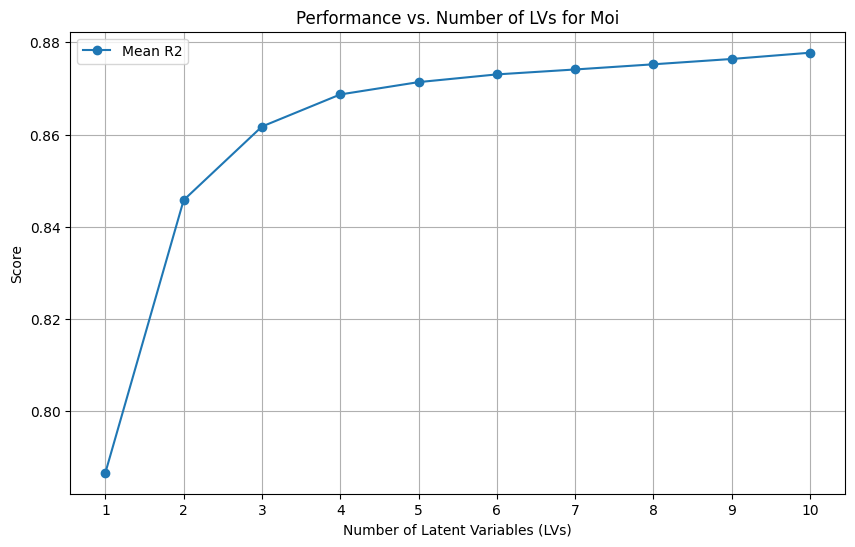

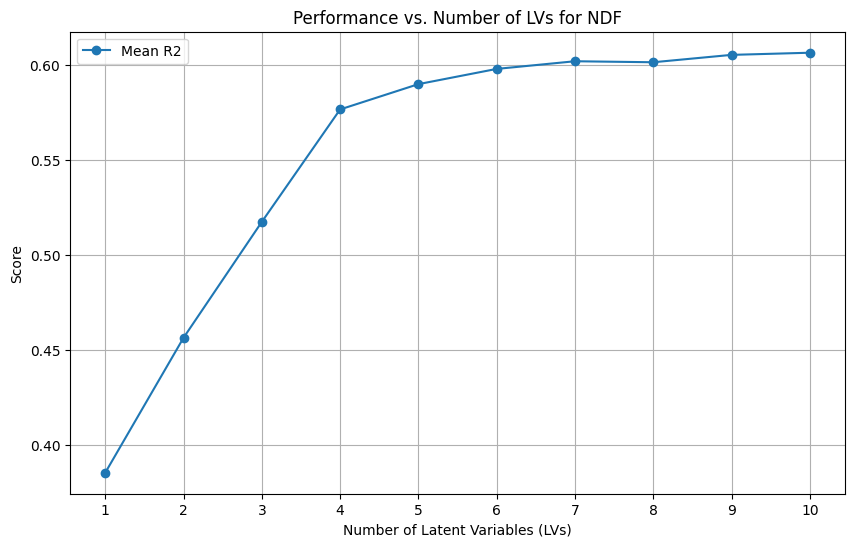

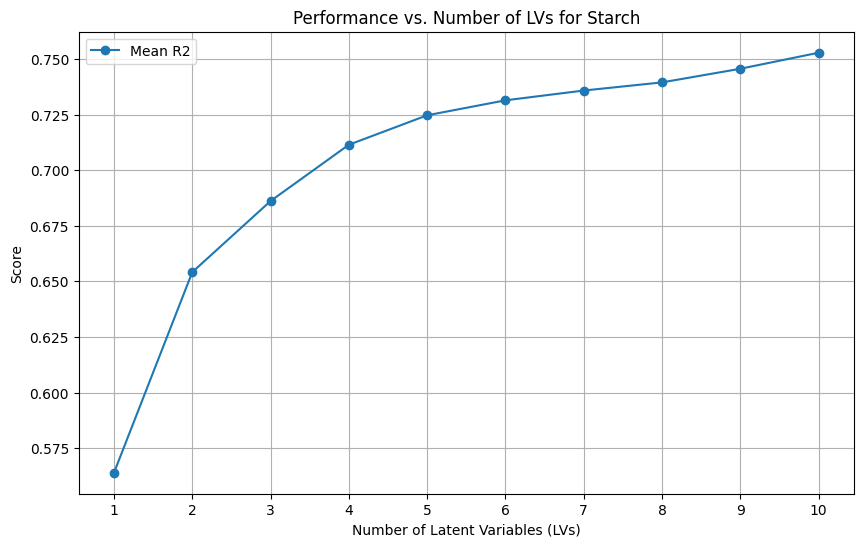

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression

target_cols = ['Moi', 'NDF', 'Starch']
n_components_range = np.arange(1, 11) # Testing from 1 to 10 LVs
n_splits = 5 # 5 folds

cv_results = {}

for target in target_cols:
    print(f"Performing CV for target: {target}")
    r2_scores_target = []
    rmse_scores_target = []
    bias_scores_target = []

    # Select the preprocessed data based on the target
    if target == 'Moi':
        X_train_preprocessed_target = X_train_preprocessed_moi
    elif target == 'NDF':
        X_train_preprocessed_target = X_train_preprocessed_ndf
    elif target == 'Starch':
        X_train_preprocessed_target = X_train_preprocessed_starch
    else:
        print(f"Warning: Unknown target '{target}'. Skipping CV.")
        continue

    # Ensure y_train is a pandas Series for simpler handling with KFold
    y_train_target = y_train[target].squeeze() # Use squeeze to convert DataFrame to Series if it's a single column

    for n in n_components_range:
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        fold_r2_scores = []
        fold_rmse_scores = []
        fold_bias_scores = []

        for train_index, val_index in kf.split(X_train_preprocessed_target):
            X_train_fold, X_val_fold = X_train_preprocessed_target.iloc[train_index], X_train_preprocessed_target.iloc[val_index]
            y_train_fold, y_val_fold = y_train_target.iloc[train_index], y_train_target.iloc[val_index]

            pls = PLSRegression(n_components=n)
            pls.fit(X_train_fold, y_train_fold)
            y_pred_fold = pls.predict(X_val_fold)

            # Calculate R2
            r2_fold = r2_score(y_val_fold, y_pred_fold)
            fold_r2_scores.append(r2_fold)

            # Calculate RMSE
            rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_pred_fold))
            fold_rmse_scores.append(rmse_fold)

            # Calculate Bias (mean difference between predicted and actual)
            bias_fold = np.mean(y_pred_fold - y_val_fold)
            fold_bias_scores.append(bias_fold)


        r2_scores_target.append(fold_r2_scores)
        rmse_scores_target.append(fold_rmse_scores)
        bias_scores_target.append(fold_bias_scores)


    cv_results[target] = {'r2': r2_scores_target, 'rmse': rmse_scores_target, 'bias': bias_scores_target}

# Print the R2, RMSE, and Bias for each number of LVs for each target
for target in target_cols:
    print(f"\nResults for {target}:")
    for i, n in enumerate(n_components_range):
        mean_r2 = np.mean(cv_results[target]['r2'][i])
        mean_rmse = np.mean(cv_results[target]['rmse'][i])
        mean_bias = np.mean(cv_results[target]['bias'][i])
        print(f"LV: {n}, Mean R2: {mean_r2:.4f}, Mean RMSE: {mean_rmse:.4f}, Mean Bias: {mean_bias:.4f}")

# Plot R2 and RMSE for each target
for target in target_cols:
    mean_r2_scores = [np.mean(scores) for scores in cv_results[target]['r2']]
    mean_rmse_scores = [np.mean(scores) for scores in cv_results[target]['rmse']]

    plt.figure(figsize=(10, 6))
    plt.plot(n_components_range, mean_r2_scores, marker='o', linestyle='-', label='Mean R2')
    #plt.plot(n_components_range, mean_rmse_scores, marker='o', linestyle='-', label='Mean RMSE')
    plt.title(f'Performance vs. Number of LVs for {target}')
    plt.xlabel('Number of Latent Variables (LVs)')
    plt.ylabel('Score')
    plt.xticks(n_components_range)
    plt.legend()
    plt.grid(True)
    plt.show()


Results for Moi:
LV: 1, Mean R2: 0.7867, Mean RMSE: 2.9729
LV: 2, Mean R2: 0.8458, Mean RMSE: 2.5180
LV: 3, Mean R2: 0.8617, Mean RMSE: 2.3871
LV: 4, Mean R2: 0.8687, Mean RMSE: 2.3284
LV: 5, Mean R2: 0.8714, Mean RMSE: 2.3040
LV: 6, Mean R2: 0.8730, Mean RMSE: 2.2914
LV: 7, Mean R2: 0.8741, Mean RMSE: 2.2821
LV: 8, Mean R2: 0.8752, Mean RMSE: 2.2691
LV: 9, Mean R2: 0.8764, Mean RMSE: 2.2599
LV: 10, Mean R2: 0.8777, Mean RMSE: 2.2467

Results for NDF:
LV: 1, Mean R2: 0.3855, Mean RMSE: 4.9135
LV: 2, Mean R2: 0.4565, Mean RMSE: 4.6235
LV: 3, Mean R2: 0.5176, Mean RMSE: 4.3512
LV: 4, Mean R2: 0.5767, Mean RMSE: 4.0778
LV: 5, Mean R2: 0.5901, Mean RMSE: 4.0073
LV: 6, Mean R2: 0.5981, Mean RMSE: 3.9687
LV: 7, Mean R2: 0.6021, Mean RMSE: 3.9463
LV: 8, Mean R2: 0.6016, Mean RMSE: 3.9454
LV: 9, Mean R2: 0.6055, Mean RMSE: 3.9280
LV: 10, Mean R2: 0.6066, Mean RMSE: 3.9232

Results for Starch:
LV: 1, Mean R2: 0.5640, Mean RMSE: 6.6003
LV: 2, Mean R2: 0.6542, Mean RMSE: 5.8550
LV: 3, Mean R2: 0

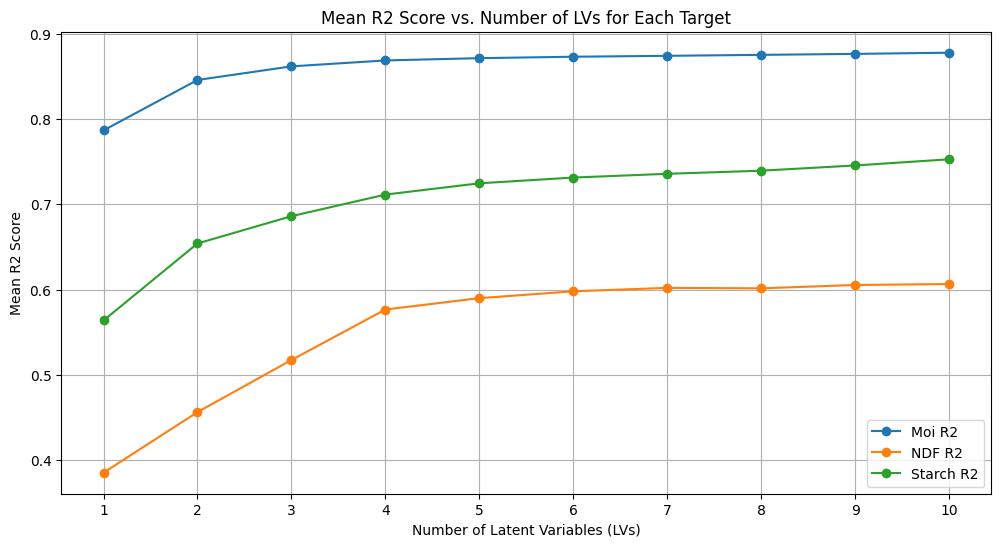

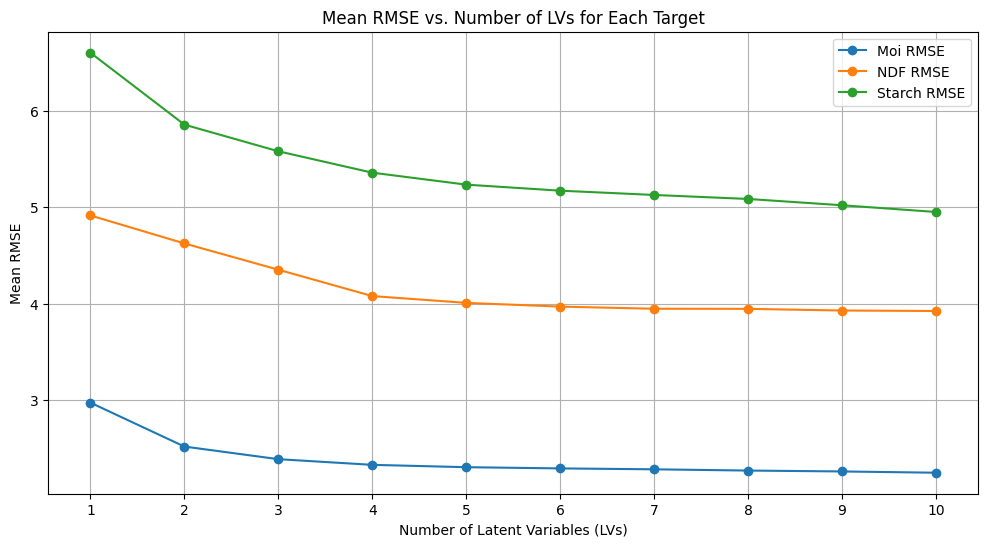

In [11]:
import matplotlib.pyplot as plt
import numpy as np

target_cols = ['Moi', 'NDF', 'Starch']
n_components_range = np.arange(1, 11) # Assuming you still want to plot up to 10 LVs as in the CV

# Print the R2 and RMSE for each number of LVs for each target
for target in target_cols:
    print(f"\nResults for {target}:")
    for i, n in enumerate(n_components_range):
        mean_r2 = np.mean(cv_results[target]['r2'][i])
        mean_rmse = np.mean(cv_results[target]['rmse'][i])
        print(f"LV: {n}, Mean R2: {mean_r2:.4f}, Mean RMSE: {mean_rmse:.4f}")


# Create a single figure for R2 scores
plt.figure(figsize=(12, 6))
for target in target_cols:
    # Calculate mean R2 across folds for each number of LVs
    mean_r2_scores = [np.mean(scores) for scores in cv_results[target]['r2']]
    plt.plot(n_components_range, mean_r2_scores, marker='o', linestyle='-', label=f'{target} R2')

plt.title('Mean R2 Score vs. Number of LVs for Each Target')
plt.xlabel('Number of Latent Variables (LVs)')
plt.ylabel('Mean R2 Score')
plt.xticks(n_components_range)
plt.legend()
plt.grid(True)
plt.show()

# Create a single figure for RMSE scores
plt.figure(figsize=(12, 6))
for target in target_cols:
    # Calculate mean RMSE across folds for each number of LVs
    mean_rmse_scores = [np.mean(scores) for scores in cv_results[target]['rmse']]
    plt.plot(n_components_range, mean_rmse_scores, marker='o', linestyle='-', label=f'{target} RMSE')

plt.title('Mean RMSE vs. Number of LVs for Each Target')
plt.xlabel('Number of Latent Variables (LVs)')
plt.ylabel('Mean RMSE')
plt.xticks(n_components_range)
plt.legend()
plt.grid(True)
plt.show()

In [18]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define the number of LVs for each target
lv_per_target = {'Moi': 6, 'NDF': 7, 'Starch': 6}

# Dictionary to store the trained models
pls_models = {}

# Train a PLS model for each target
for target, n_lv in lv_per_target.items():
    print(f"Training PLS model for target: {target} with {n_lv} LVs")

    # Select the preprocessed training data based on the target
    if target == 'Moi':
        X_train_preprocessed_target = X_train_preprocessed_moi
    elif target == 'NDF':
        X_train_preprocessed_target = X_train_preprocessed_ndf
    elif target == 'Starch':
        X_train_preprocessed_target = X_train_preprocessed_starch
    else:
        print(f"Warning: Unknown target '{target}'. Skipping training.")
        continue

    # Instantiate and train the PLS model
    pls_model = PLSRegression(n_components=n_lv)
    pls_model.fit(X_train_preprocessed_target, y_train[target])

    # Store the trained model
    pls_models[target] = pls_model

    # Make predictions on the training data (calibration)
    y_train_pred = pls_model.predict(X_train_preprocessed_target)

    # Calculate calibration metrics
    r2_cal = r2_score(y_train[target], y_train_pred)
    mse_cal = mean_squared_error(y_train[target], y_train_pred)
    rmse_cal = np.sqrt(mse_cal)
    bias_cal = np.mean(y_train_pred - y_train[target])

    # Print calibration metrics with bias in scientific notation
    print(f"  Calibration R2 Score: {r2_cal:.4f}")
    print(f"  Calibration RMSE: {rmse_cal:.4f}")
    print(f"  Calibration Bias: {bias_cal:e}") # Format bias using scientific notation

print("\nPLS model training completed for all targets.")

Training PLS model for target: Moi with 6 LVs
  Calibration R2 Score: 0.8833
  Calibration RMSE: 2.2066
  Calibration Bias: 1.125630e-14
Training PLS model for target: NDF with 7 LVs
  Calibration R2 Score: 0.6211
  Calibration RMSE: 3.8718
  Calibration Bias: 5.045850e-15
Training PLS model for target: Starch with 6 LVs
  Calibration R2 Score: 0.7609
  Calibration RMSE: 4.9116
  Calibration Bias: 8.029858e-15

PLS model training completed for all targets.


In [22]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Evaluate each trained model on the test set
for target, pls_model in pls_models.items():
    print(f"\nEvaluating PLS model for target: {target}")

    # Select the preprocessed test data based on the target
    if target == 'Moi':
        X_test_preprocessed_target = X_test_preprocessed_moi
    elif target == 'NDF':
        X_test_preprocessed_target = X_test_preprocessed_ndf
    elif target == 'Starch':
        X_test_preprocessed_target = X_test_preprocessed_starch
    else:
        print(f"Warning: Unknown target '{target}'. Skipping evaluation.")
        continue

    # Make predictions on the test data
    y_test_pred = pls_model.predict(X_test_preprocessed_target)

    # Ensure y_test is a Series for consistent calculation
    y_test_target = y_test[target].squeeze()


    # Calculate test metrics
    r2_test = r2_score(y_test_target, y_test_pred)
    mse_test = mean_squared_error(y_test_target, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    bias_test = np.mean(y_test_pred - y_test_target)

    # Print test metrics with bias in scientific notation
    print(f"  Test R2 Score: {r2_test:.4f}")
    print(f"  Test RMSE: {rmse_test:.4f}")
    print(f"  Test Bias: {bias_test:e}") # Format bias using scientific notation

print("\nPLS model evaluation on the test set completed for all targets.")


Evaluating PLS model for target: Moi
  Test R2 Score: 0.0532
  Test RMSE: 5.4266
  Test Bias: -4.711051e+00

Evaluating PLS model for target: NDF
  Test R2 Score: -1.7354
  Test RMSE: 3.1980
  Test Bias: 1.903286e-01

Evaluating PLS model for target: Starch
  Test R2 Score: -4.2148
  Test RMSE: 8.8099
  Test Bias: 1.023539e+00

PLS model evaluation on the test set completed for all targets.



Evaluating PLS model for target: Moi
Using optimal number of LVs: 16
Model trained successfully on the training data.
Predictions made on the test set.
R2 Score on the test set: -1.5595
RMSE on the test set: 8.9220

Evaluating PLS model for target: NDF
Using optimal number of LVs: 6
Model trained successfully on the training data.
Predictions made on the test set.
R2 Score on the test set: -1.6758
RMSE on the test set: 3.1630

Evaluating PLS model for target: Starch
Using optimal number of LVs: 20
Model trained successfully on the training data.
Predictions made on the test set.
R2 Score on the test set: -6.7835
RMSE on the test set: 10.7630



Plotting regression curve for target: Moi


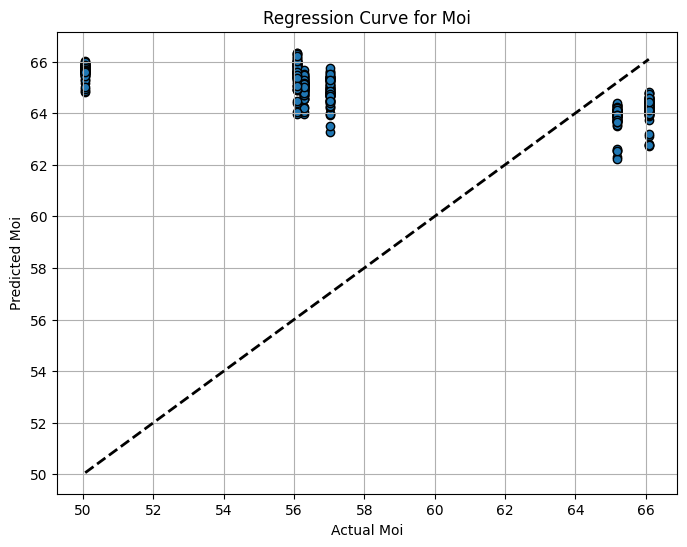


Plotting regression curve for target: NDF


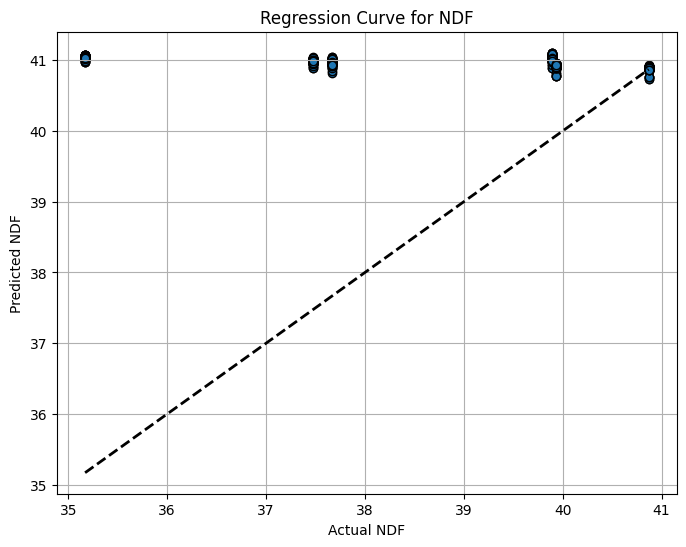


Plotting regression curve for target: Starch


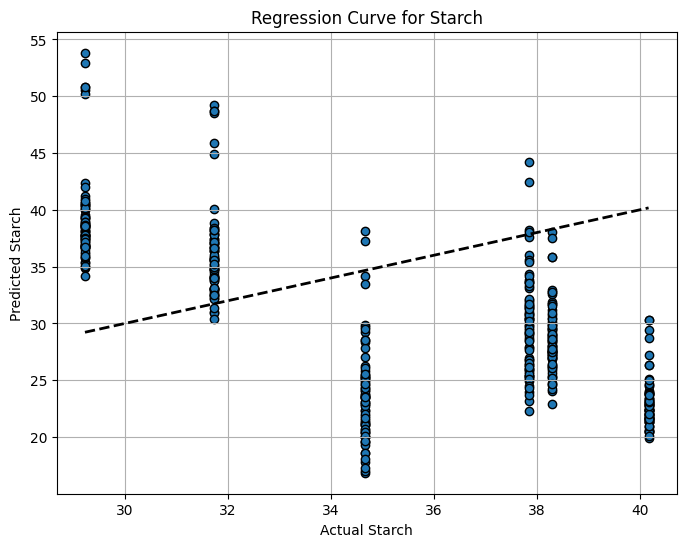